In [ ]:
#!/usr/bin/python3

print("Checking for nltk")
try:
    import nltk

except ImportError:
    print("You should install nltk before continuing")

print("Checking for numpy")
try:
    import numpy
except ImportError:
    print("You should install numpy before continuing")

print("Checking for scipy")
try:
    import scipy
except:
    print("You should install scipy before continuing")

print("Checking for sklearn")
try:
    import sklearn
except:
    print("You should install sklearn before continuing")

print("Downloading the Enron dataset (this may take a while)")
print("To check on progress, you can cd up one level, then execute <ls -lthr>")
print("Enron dataset should be last item on the list, along with its current size")
print("Download will complete at about 1.82 GB")

import requests
url = "https://www.cs.cmu.edu/~./enron/enron_mail_20150507.tar.gz"
filename = "../enron_mail_20150507.tar.gz"
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)
print("Download Complete!")

print("Unzipping Enron dataset (This may take a while)")
import tarfile
tfile = tarfile.open("../enron_mail_20150507.tar.gz")
tfile.extractall(".")
tfile.close()

print("You're ready to go!")



Checking for nltk
Checking for numpy
Checking for scipy
Checking for sklearn
To check on progress, you can cd up one level, then execute <ls -lthr>
Enron dataset should be last item on the list, along with its current size
Download will complete at about 1.82 GB


In [1]:
#!/usr/bin/python3

import joblib
import numpy

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif


def preprocess(words_file = "tools/word_data.pkl", authors_file="email_authors.pkl"):
    """ 
        this function takes a pre-made list of email texts (by default word_data.pkl)
        and the corresponding authors (by default email_authors.pkl) and performs
        a number of preprocessing steps:
            -- splits into training/testing sets (10% testing)
            -- vectorizes into tfidf matrix
            -- selects/keeps most helpful features

        after this, the feaures and labels are put into numpy arrays, which play nice with sklearn functions

        4 objects are returned:
            -- training/testing features
            -- training/testing labels

    """

    ### the words (features) and authors (labels), already largely preprocessed
    ### this preprocessing will be repeated in the text learning mini-project
    authors_file_handler = open(authors_file, "rb")
    authors = joblib.load(authors_file_handler)


    words_file_handler = open(words_file, "rb")
    word_data = joblib.load(words_file_handler)

    ### test_size is the percentage of events assigned to the test set
    ### (remainder go into training)
    features_train, features_test, labels_train, labels_test = train_test_split(word_data, authors, test_size=0.1, random_state=42)


    ### text vectorization--go from strings to lists of numbers
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
    features_train_transformed = vectorizer.fit_transform(features_train)
    features_test_transformed  = vectorizer.transform(features_test)



    ### feature selection, because text is super high dimensional and 
    ### can be really computationally chewy as a result
    selector = SelectPercentile(f_classif, percentile=10)
    selector.fit(features_train_transformed, labels_train)
    features_train_transformed = selector.transform(features_train_transformed).toarray()
    features_test_transformed  = selector.transform(features_test_transformed).toarray()

    ### info on the data
    print("No. of Chris training emails : ", sum(labels_train))
    print("No. of Sara training emails : ", len(labels_train)-sum(labels_train))
    
    return features_train_transformed, features_test_transformed, labels_train, labels_test


In [4]:
#!/usr/bin/python3

""" 
    This is the code to accompany the Lesson 1 (Naive Bayes) mini-project. 

    Use a Naive Bayes Classifier to identify emails by their authors
    
    authors and labels:
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")

### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


##############################################################
# Enter Your Code Here
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
#fit model to classifier
clf.fit(features_train, labels_train)
#predict on test data
y_pred = clf.predict(features_test)


##############################################################

##############################################################
'''
You Will be Required to record time for Training and Predicting 
The Code Given on Udacity Website is in Python-2
The Following Code is Python-3 version of the same code
'''

t0 = time()
clf.fit(features_train, labels_train)
print("Training Time:", round(time()-t0, 3), "s")

t0 = time()
clf.predict(features_test)
print("Predicting Time:", round(time()-t0, 3), "s")

##############################################################

No. of Chris training emails :  7936
No. of Sara training emails :  7884
Training Time: 0.589 s
Predicting Time: 0.063 s


In [7]:
#accuracy of naive bayes classifier
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, labels_test)
acc

0.9732650739476678

In [8]:
'''SVM
SUPPORT VECTOR MACHINES
'''

'SVM\nSUPPORT VECTOR MACHINES\n'

In [13]:
#!/usr/bin/python3

""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
#from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


#########################################################
### your code goes here ###
from sklearn.svm import SVC
clf = SVC(kernel='linear')

clf.fit(features_train, labels_train)
clf.predict(features_test)

#########################################################

#########################################################
'''
You'll be Provided similar code in the Quiz
But the Code provided in Quiz has an Indexing issue
The Code Below solves that issue, So use this one
'''

#features_train = features_train[:int(len(features_train)/100)]
#labels_train = labels_train[:int(len(labels_train)/100)]

#########################################################
t0 = time()
clf.fit(features_train, labels_train)
print("Training Time:", round(time()-t0, 3), "s")

t0 = time()
clf.predict(features_test)
print("Predicting Time:", round(time()-t0, 3), "s")

No. of Chris training emails :  7936
No. of Sara training emails :  7884
Training Time: 65.062 s
Predicting Time: 7.182 s


In [10]:
#Accuracy of SVC classifier
acc = accuracy_score(clf.predict(features_test), labels_test)
acc

0.9840728100113766

In [ ]:
'''One way to speed up an algorithm is to train it on a smaller training dataset. 
The tradeoff is that the accuracy almost always goes down when you do this. 
Let’s explore this more concretely: add in the following two lines immediately before training your classifier.

features_train = features_train[:len(features_train)/100]
labels_train = labels_train[:len(labels_train)/100]

These lines effectively slice the training dataset down to 1% of its original size, 
tossing out 99% of the training data. You can leave all other code unchanged. What’s the accuracy now?'''

In [14]:
#!/usr/bin/python3

""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
#from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


#########################################################
### your code goes here ###
from sklearn.svm import SVC
clf = SVC(kernel='linear')

clf.fit(features_train, labels_train)
clf.predict(features_test)

#########################################################

#########################################################
'''
You'll be Provided similar code in the Quiz
But the Code provided in Quiz has an Indexing issue
The Code Below solves that issue, So use this one
'''

features_train = features_train[:int(len(features_train)/100)]
labels_train = labels_train[:int(len(labels_train)/100)]

#########################################################
t0 = time()
clf.fit(features_train, labels_train)
print("Training Time:", round(time()-t0, 3), "s")

t0 = time()
clf.predict(features_test)
print("Predicting Time:", round(time()-t0, 3), "s")

No. of Chris training emails :  7936
No. of Sara training emails :  7884
Training Time: 0.022 s
Predicting Time: 0.213 s


In [15]:
#Accuracy of SVC classifier
acc = accuracy_score(clf.predict(features_test), labels_test)
acc

0.8845278725824801

In [16]:
'''Keep the training set slice code from the last quiz, 
so that you are still training on only 1% of the full training set. 
Change the kernel of your SVM to “rbf”. What’s the accuracy now, with this more complex kernel?'''

'Keep the training set slice code from the last quiz, \nso that you are still training on only 1% of the full training set. \nChange the kernel of your SVM to “rbf”. What’s the accuracy now, with this more complex kernel?'

In [21]:
#!/usr/bin/python3

""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
#from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()

features_train = features_train[:int(len(features_train)/100)]
labels_train = labels_train[:int(len(labels_train)/100)]
#########################################################
### your code goes here ###
from sklearn.svm import SVC
clf = SVC(kernel='rbf')

clf.fit(features_train, labels_train)
clf.predict(features_test)

#########################################################

#########################################################
'''
You'll be Provided similar code in the Quiz
But the Code provided in Quiz has an Indexing issue
The Code Below solves that issue, So use this one
'''



#########################################################
#t0 = time()
#clf.fit(features_train, labels_train)
#print("Training Time:", round(time()-t0, 3), "s")

#t0 = time()
#clf.predict(features_test)
#print("Predicting Time:", round(time()-t0, 3), "s")

No. of Chris training emails :  7936
No. of Sara training emails :  7884


"\nYou'll be Provided similar code in the Quiz\nBut the Code provided in Quiz has an Indexing issue\nThe Code Below solves that issue, So use this one\n"

In [22]:
#Accuracy of SVC classifier
acc = accuracy_score(clf.predict(features_test), labels_test)
acc

0.8953356086461889

In [23]:
#!/usr/bin/python3

""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
#from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()

features_train = features_train[:int(len(features_train)/100)]
labels_train = labels_train[:int(len(labels_train)/100)]
#########################################################
### your code goes here ###
from sklearn.svm import SVC
clf = SVC(kernel='rbf',C =10)

clf.fit(features_train, labels_train)
clf.predict(features_test)
acc = accuracy_score(clf.predict(features_test), labels_test)
print(acc)
#########################################################

#########################################################
'''
You'll be Provided similar code in the Quiz
But the Code provided in Quiz has an Indexing issue
The Code Below solves that issue, So use this one
'''



#########################################################
#t0 = time()
#clf.fit(features_train, labels_train)
#print("Training Time:", round(time()-t0, 3), "s")

#t0 = time()
#clf.predict(features_test)
#print("Predicting Time:", round(time()-t0, 3), "s")

No. of Chris training emails :  7936
No. of Sara training emails :  7884
0.8998862343572241


"\nYou'll be Provided similar code in the Quiz\nBut the Code provided in Quiz has an Indexing issue\nThe Code Below solves that issue, So use this one\n"

In [25]:
#!/usr/bin/python3

""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
#from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()

features_train = features_train[:int(len(features_train)/100)]
labels_train = labels_train[:int(len(labels_train)/100)]
#########################################################
### your code goes here ###
from sklearn.svm import SVC
clf = SVC(kernel='rbf',C =10000)

clf.fit(features_train, labels_train)
clf.predict(features_test)
acc = accuracy_score(clf.predict(features_test), labels_test)
print(acc)
#########################################################

#########################################################
'''
You'll be Provided similar code in the Quiz
But the Code provided in Quiz has an Indexing issue
The Code Below solves that issue, So use this one
'''



#########################################################
#t0 = time()
#clf.fit(features_train, labels_train)
#print("Training Time:", round(time()-t0, 3), "s")

#t0 = time()
#clf.predict(features_test)
#print("Predicting Time:", round(time()-t0, 3), "s")

No. of Chris training emails :  7936
No. of Sara training emails :  7884
0.8998862343572241


"\nYou'll be Provided similar code in the Quiz\nBut the Code provided in Quiz has an Indexing issue\nThe Code Below solves that issue, So use this one\n"

In [26]:
#!/usr/bin/python3

""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
#from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()

#########################################################
### your code goes here ###
from sklearn.svm import SVC
clf = SVC(kernel='rbf',C =10000)

clf.fit(features_train, labels_train)
clf.predict(features_test)
acc = accuracy_score(clf.predict(features_test), labels_test)
print(acc)
#########################################################

#########################################################
'''
You'll be Provided similar code in the Quiz
But the Code provided in Quiz has an Indexing issue
The Code Below solves that issue, So use this one
'''



#########################################################
#t0 = time()
#clf.fit(features_train, labels_train)
#print("Training Time:", round(time()-t0, 3), "s")

#t0 = time()
#clf.predict(features_test)
#print("Predicting Time:", round(time()-t0, 3), "s")

No. of Chris training emails :  7936
No. of Sara training emails :  7884
0.9960182025028441


"\nYou'll be Provided similar code in the Quiz\nBut the Code provided in Quiz has an Indexing issue\nThe Code Below solves that issue, So use this one\n"

In [ ]:
'''Decision Trees

In this project, we will again try to identify the authors in a body of emails, 
this time using a decision tree. The starter code is in decision_tree/dt_author_id.py.

Get the data for this mini project from here.

Once again, you'll do the mini-project on your own computer and enter your answers in the web browser. 
You can find the instructions for the decision tree mini-project here.

Using the starter code in decision_tree/dt_author_id.py, get a decision tree up and running as a classifier, 
setting min_samples_split=40. 
It will probably take a while to train. What’s the accuracy?
'''

In [27]:
#!/usr/bin/python

""" 
    This is the code to accaompany the Lesson 3 (decision tree) mini-project.

    Use a Decision Tree to identify emails from the Enron corpus by author:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
#from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(min_samples_split = 40, random_state=42)
clf.fit(features_train, labels_train)
clf.predict(features_test)
acc = accuracy_score(clf.predict(features_test), labels_test)
print(acc)

#########################################################




No. of Chris training emails :  7936
No. of Sara training emails :  7884
0.9761092150170648


In [28]:
'''What's the number of features in your data? 
(Hint: the data is organized into a numpy array where the number of rows is the number of data points 
and the number of columns is the number of features; so to extract this number, 
use a line of code like len(features_train[0]).)'''

len(features_train[0])

3785

In [29]:
#CHANGE PREPROCESS
'''go into ../tools/email_preprocess.py, and find the line of code that looks like this:

selector = SelectPercentile(f_classif, percentile=10)

Change percentile from 10 to 1, and rerun dt_author_id.py. What’s the number of features now?'''

#!/usr/bin/python3

import joblib
import numpy

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif


def preprocess(words_file = "tools/word_data.pkl", authors_file="email_authors.pkl"):
    """ 
        this function takes a pre-made list of email texts (by default word_data.pkl)
        and the corresponding authors (by default email_authors.pkl) and performs
        a number of preprocessing steps:
            -- splits into training/testing sets (10% testing)
            -- vectorizes into tfidf matrix
            -- selects/keeps most helpful features

        after this, the feaures and labels are put into numpy arrays, which play nice with sklearn functions

        4 objects are returned:
            -- training/testing features
            -- training/testing labels

    """

    ### the words (features) and authors (labels), already largely preprocessed
    ### this preprocessing will be repeated in the text learning mini-project
    authors_file_handler = open(authors_file, "rb")
    authors = joblib.load(authors_file_handler)


    words_file_handler = open(words_file, "rb")
    word_data = joblib.load(words_file_handler)

    ### test_size is the percentage of events assigned to the test set
    ### (remainder go into training)
    features_train, features_test, labels_train, labels_test = train_test_split(word_data, authors, test_size=0.1, random_state=42)


    ### text vectorization--go from strings to lists of numbers
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
    features_train_transformed = vectorizer.fit_transform(features_train)
    features_test_transformed  = vectorizer.transform(features_test)



    ### feature selection, because text is super high dimensional and 
    ### can be really computationally chewy as a result
    selector = SelectPercentile(f_classif, percentile=1)
    selector.fit(features_train_transformed, labels_train)
    features_train_transformed = selector.transform(features_train_transformed).toarray()
    features_test_transformed  = selector.transform(features_test_transformed).toarray()

    ### info on the data
    print("No. of Chris training emails : ", sum(labels_train))
    print("No. of Sara training emails : ", len(labels_train)-sum(labels_train))
    
    return features_train_transformed, features_test_transformed, labels_train, labels_test


In [30]:
#!/usr/bin/python

""" 
    This is the code to accaompany the Lesson 3 (decision tree) mini-project.

    Use a Decision Tree to identify emails from the Enron corpus by author:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
#from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(min_samples_split = 40, random_state=42)
clf.fit(features_train, labels_train)
clf.predict(features_test)
acc = accuracy_score(clf.predict(features_test), labels_test)
print(acc)

#########################################################




No. of Chris training emails :  7936
No. of Sara training emails :  7884
0.9658703071672355


In [31]:

len(features_train[0])

379

In [ ]:
'''Datasets and Questions

The aggregated Enron email + financial dataset is stored in a dictionary, where each key in the dictionary is a person’s name and the value is a dictionary containing all the features of that person.
The email + finance (E+F) data dictionary is stored as a pickle file, which is a handy way to store and load python objects directly. Use datasets_questions/explore_enron_data.py to load the dataset.

How many data points (people) are in the dataset?
'''

In [33]:
#!/usr/bin/python3

""" 
    Starter code for exploring the Enron dataset (emails + finances);
    loads up the dataset (pickled dict of dicts).

    The dataset has the form:
    enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"] = { features_dict }

    {features_dict} is a dictionary of features associated with that person.
    You should explore features_dict as part of the mini-project,
    but here's an example to get you started:

    enron_data["SKILLING JEFFREY K"]["bonus"] = 5600000
    
"""

import joblib

enron_data = joblib.load(open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/final_project/final_project_dataset.pkl", "rb"))



In [34]:
#How many data points (people) are in the dataset?
total = len(enron_data)
total

146

In [35]:
#For each person, how many features are available?
list(enron_data.items())[0]

('METTS MARK',
 {'salary': 365788,
  'to_messages': 807,
  'deferral_payments': 'NaN',
  'total_payments': 1061827,
  'loan_advances': 'NaN',
  'bonus': 600000,
  'email_address': 'mark.metts@enron.com',
  'restricted_stock_deferred': 'NaN',
  'deferred_income': 'NaN',
  'total_stock_value': 585062,
  'expenses': 94299,
  'from_poi_to_this_person': 38,
  'exercised_stock_options': 'NaN',
  'from_messages': 29,
  'other': 1740,
  'from_this_person_to_poi': 1,
  'poi': False,
  'long_term_incentive': 'NaN',
  'shared_receipt_with_poi': 702,
  'restricted_stock': 585062,
  'director_fees': 'NaN'})

In [36]:
#The “poi” feature records whether the person is a person of interest, according to our definition. How many POIs are there in the E+F dataset?
#In other words, count the number of entries in the dictionary where
#data[person_name]["poi"]==1

count = 0
for k,v in enron_data.items():
    if v['poi']==True:
        count +=1
print(count)

18


In [ ]:
#We compiled a list of all POI names (in ../final_project/poi_names.txt) 
#and associated email addresses (in ../final_project/poi_email_addresses.py).

#How many POI’s were there total? (Use the names file, not the email addresses, since many folks have more than one address and a few didn’t work for Enron, so we don’t have their emails.)
35

In [37]:
'''Like any dict of dicts, individual people/features can be accessed like so:

enron_data["LASTNAME FIRSTNAME"]["feature_name"]
or, sometimes
enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"]["feature_name"]

What is the total value of the stock belonging to James Prentice?
Go to Quiz

Lastname, Firstname and Middle Initial all in CAPS.
'''
for k, v in enron_data.items():
    if 'PRENTICE' in k:
        print(v['total_stock_value'])


1095040


In [ ]:
enron_data.get('PRENTICE JAMES',[])['total_stock_value']

In [38]:
'''Like any dict of dicts, individual people/features can be accessed like so:

enron_data["LASTNAME FIRSTNAME"]["feature_name"]

How many email messages do we have from Wesley Colwell to persons of interest?
'''
enron_data.get('COLWELL WESLEY',[])['from_this_person_to_poi']

11

In [39]:
#What’s the value of stock options exercised by Jeffrey K Skilling? 
enron_data.get('SKILLING JEFFREY K',[])['exercised_stock_options']

19250000

In [40]:
#Of these three individuals (Lay, Skilling and Fastow), 
#who took home the most money (largest value of “total_payments” feature)?

#How much money did that person get?

enron_data.get('LAY KENNETH L',[])['total_payments']

103559793

In [41]:
enron_data.get('SKILLING JEFFREY K',[])['total_payments']

8682716

In [42]:
enron_data.get('FASTOW ANDREW S',[])['total_payments']

2424083

In [ ]:
from operator import itemgetter

total_payments_dict = {}
poi_list = ['SKILLING JEFFREY K', 'LAY KENNETH L', 'FASTOW ANDREW S']
for k in poi_list:
    total_payments_dict.update({k: enron_data.get(k,[])['total_payments']})

max(total_payments_dict.items(), key=itemgetter(1)) 

In [43]:
#How many folks in this dataset have a quantified salary? What about a known email address? 
people_counter = 0  # count only those having quantified salary

for k,v in enron_data.items():
    salary =  v['salary']
    if salary != 'NaN':
        people_counter += 1
people_counter

95

In [44]:
people_with_email = 0  # count only those having email addresses

for k,v in enron_data.items():
    email =  v['email_address']
    if email != 'NaN':
        people_with_email += 1
people_with_email

111

In [45]:
#How many people in the E+F dataset (as it currently exists) have “NaN” for their total payments?
#What percentage of people in the dataset as a whole is this?
people_with_email = 0  # count only those having email addresses

for k,v in enron_data.items():
    email =  v['email_address']
    if email != 'NaN':
        people_with_email += 1
people_with_email

111

In [46]:
people_nantotpay = 0  # count only those with no total pay

for k,v in enron_data.items():
    totpay =  v['total_payments']
    if totpay == 'NaN':
        people_nantotpay += 1
    percen_totpay = (people_nantotpay / len(enron_data)) * 100
print(people_nantotpay)
print(percen_totpay)

21
14.383561643835616


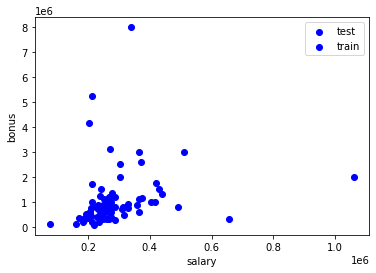

In [49]:
#!/usr/bin/python3

"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    

import os
import sys
import joblib
sys.path.append(os.path.abspath("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/tools/"))
from feature_format import featureFormat, targetFeatureSplit
dictionary = joblib.load( open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/final_project/final_project_dataset_modified.pkl", "rb") )


### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True, sort_keys = '/home/adebisi/UDACITY PROJECTS/ud120-projects-master/tools/python2_lesson06_keys.pkl')
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "b"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.








### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()


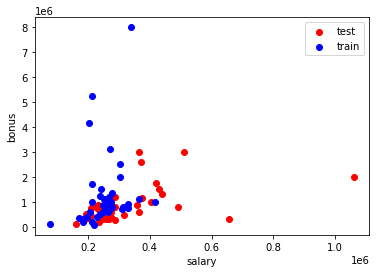

In [50]:
#Change the value of test_color from "b" to “r” (for “red”), and rerun. 

#!/usr/bin/python3

"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    

import os
import sys
import joblib
sys.path.append(os.path.abspath("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/tools/"))
from feature_format import featureFormat, targetFeatureSplit
dictionary = joblib.load( open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/final_project/final_project_dataset_modified.pkl", "rb") )


### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True, sort_keys = '/home/adebisi/UDACITY PROJECTS/ud120-projects-master/tools/python2_lesson06_keys.pkl')
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.








### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()


In [51]:
#Import LinearRegression from sklearn, and create/fit your regression. 
#Name it reg so that the plotting code will show it overlaid on the scatterplot. Does it fall approximately where you expected it?

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(feature_train, target_train)

In [52]:
#Slope of regression
reg.coef_

array([5.44814029])

In [53]:
#Intercept
reg.intercept_

-102360.54329387983

In [55]:
#regression score
reg.score(feature_train, target_train)

0.04550919269952436

In [56]:
reg.score(feature_test, target_test)

-1.48499241736851

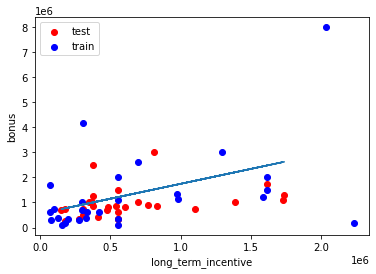

In [57]:
'''There are lots of finance features available, some of which might be more powerful than others 
in terms of predicting a person’s bonus. For example, suppose you thought about the data a bit 
and guess that the “long_term_incentive” feature, which is supposed to reward employees for 
contributing to the long-term health of the company, might be more closely related to a person’s 
bonus than their salary is.

A way to confirm that you’re right in this hypothesis is to regress the bonus against the long 
term incentive, and see if the regression score is significantly higher than regressing the 
bonus against the salary. Perform the regression of bonus against long term incentive--
what’s the score on the test data?
'''


### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True, sort_keys = 'tools/python2_lesson06_keys.pkl')
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(feature_train, target_train)



### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()


In [58]:
reg.score(feature_test, target_test)

-0.5927128999498643

In [ ]:
'''Add these two lines near the bottom of finance_regression.py, right before plt.xlabel(features_list[1]):

reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b")

Now we’ll be drawing two regression lines, one fit on the test data (with outlier) and one fit on the training data (no outlier). Look at the plot now--big difference, huh? That single outlier is driving most of the difference. What’s the slope of the new regression line?

(That’s a big difference, and it’s mostly driven by the outliers. The next lesson will dig into outliers in more detail so you have tools to detect and deal with them.)'''

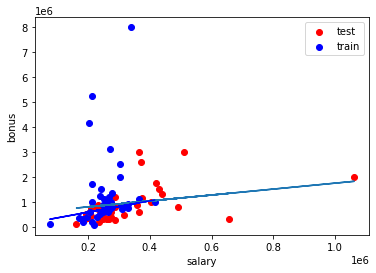

In [59]:
#Change the value of test_color from "b" to “r” (for “red”), and rerun. 

#!/usr/bin/python3

"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    

import os
import sys
import joblib
sys.path.append(os.path.abspath("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/tools/"))
from feature_format import featureFormat, targetFeatureSplit
dictionary = joblib.load( open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/final_project/final_project_dataset_modified.pkl", "rb") )


### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True, sort_keys = '/home/adebisi/UDACITY PROJECTS/ud120-projects-master/tools/python2_lesson06_keys.pkl')
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.








### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b") 
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()


In [60]:
# What’s the slope of the new regression line?
reg.coef_

array([2.27410114])

In [61]:
#OUTLIERS

In [63]:
#!/usr/bin/python


def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    ### your code goes here

    
    return cleaned_data


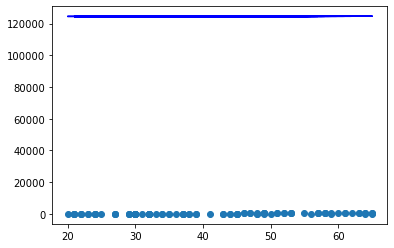

outlierCleaner() is returning an empty list, no refitting to be done


In [65]:
#!/usr/bin/python3

import random
import numpy
import matplotlib.pyplot as plt
import joblib

#from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = joblib.load( open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/outliers/practice_outliers_ages.pkl", "rb") )
net_worths = joblib.load( open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/outliers/practice_outliers_net_worths.pkl", "rb") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like










try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print("Your regression object doesn't exist, or isn't name reg")
    print("Can't make predictions to use in identifying outliers")







### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("You don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")




In [ ]:
#Deploy a linear regression, where net worth is the target and the feature being used to
#predict it is a person’s age (remember to train on the training data!). 

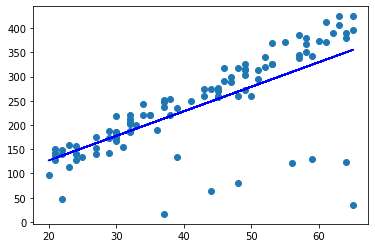

outlierCleaner() is returning an empty list, no refitting to be done


In [66]:
#!/usr/bin/python3

import random
import numpy
import matplotlib.pyplot as plt
import joblib

#from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = joblib.load( open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/outliers/practice_outliers_ages.pkl", "rb") )
net_worths = joblib.load( open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/outliers/practice_outliers_net_worths.pkl", "rb") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
reg = LinearRegression().fit(ages_train,net_worths_train)



try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print("Your regression object doesn't exist, or isn't name reg")
    print("Can't make predictions to use in identifying outliers")



### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("You don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")



In [68]:
#what slope does your regression have? 
reg.coef_

array([[5.07793064]])

In [69]:
#What is the score you get when using your regression to make predictions with the test data?
reg.score(ages_test, net_worths_test)

0.8782624703664672

In [ ]:
''' return a list called cleaned_data that has only 81 elements in it, 
which are the 81 training points where the predictions and the actual values (net_worths) 
have the smallest errors (90 * 0.9 = 81). The format of cleaned_data should be a list of tuples, 
where each tuple has the form (age, net_worth, error).

Once this cleaning function is working, you should see the regression result changes. 
What is the new slope? Is it closer to the “correct” result of 6.25?'''

In [70]:
#Clean outliers
#!/usr/bin/python


def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    ### your code goes here
    for pred, a, net_w in zip(predictions, ages, net_worths):
        cleaned_data.append((a, net_w, pred - net_w))

    cleaned_data.sort(key=lambda i: i[2]) # Sort the data by the 2nd index (third element, which is the error)

    #clean away the largest 10% of the data, remember it's sorted
    return cleaned_data[:81]


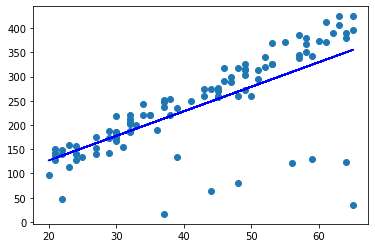

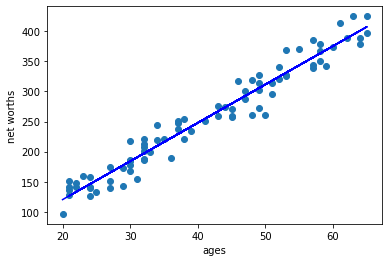

In [71]:
#!/usr/bin/python3

import random
import numpy
import matplotlib.pyplot as plt
import joblib

#from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = joblib.load( open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/outliers/practice_outliers_ages.pkl", "rb") )
net_worths = joblib.load( open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/outliers/practice_outliers_net_worths.pkl", "rb") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
reg = LinearRegression().fit(ages_train,net_worths_train)



try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print("Your regression object doesn't exist, or isn't name reg")
    print("Can't make predictions to use in identifying outliers")



### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("You don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")



In [72]:
#What is the new slope? Is it closer to the “correct” result of 6.25?
reg.coef_

array([[6.36859481]])

In [73]:
#What’s the new score when you use the regression to make predictions on the test set?
reg.score(ages_test, net_worths_test)

0.9831894553955322

In [ ]:
# Identifying and cleaning away outliers is something you should always think about when looking at a dataset for the first time, and now you’ll get some hands-on experience with the Enron data. 

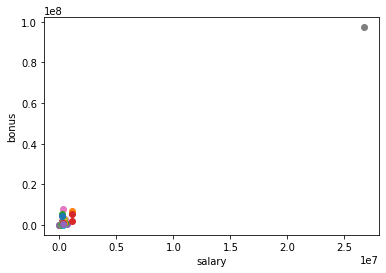

In [75]:
#!/usr/bin/python3
import os
import joblib
import sys
import matplotlib.pyplot
sys.path.append(os.path.abspath("../tools/"))
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = joblib.load( open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/final_project/final_project_dataset.pkl", "rb") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [ ]:
'''There’s one outlier that should pop out to you immediately. Now the question is to identify the source. 
We found the original data source to be very helpful for this identification; 
you can find that PDF in final_project/enron61702insiderpay.pdf
What’s the name of the dictionary key of this data point? 
(e.g. if this is Ken Lay, the answer would be “LAY KENNETH L”).'''

#A quick way to remove a key-value pair from a dictionary is the following line: dictionary.pop( key, 0 )
#Write a line like this (you’ll have to modify the dictionary and key names, of course) and remove 
#the outlier before calling featureFormat(). 
#Now rerun the code, so your scatterplot doesn’t have this outlier anymore. Are all the outliers gone? 



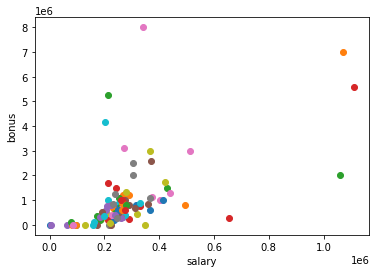

In [76]:
#!/usr/bin/python3
import os
import joblib
import sys
import matplotlib.pyplot
sys.path.append(os.path.abspath("../tools/"))
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = joblib.load( open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/final_project/final_project_dataset.pkl", "rb") )
features = ["salary", "bonus"]
data_dict.pop('TOTAL',0)

data = featureFormat(data_dict, features)


### your code below

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

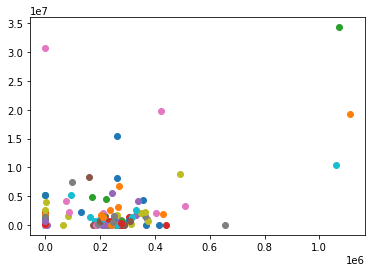

No predictions object named pred found, no clusters to plot


In [2]:
#CLUSTERING
#!/usr/bin/python3

""" 
    Skeleton code for k-means clustering mini-project.
"""

import os
import joblib
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append(os.path.abspath("/home/adebisi/UDACITY PROJECTS/tools/"))
from feature_format import featureFormat, targetFeatureSplit

def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = joblib.load( open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred



### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("No predictions object named pred found, no clusters to plot")


In [7]:
#You’ll start with performing k-means based on just two financial features--take a look at the code, 
#and determine which features the code uses for clustering.
#Run the code, which will create a scatterplot of the data. Think a little bit about what clusters 
#you would expect to arise if 2 clusters are created.


'''Deploy k-means clustering on the financial_features data, with 2 clusters specified as a parameter. Store your cluster predictions to a list called pred, so that the Draw() command at the bottom of the script works properly. In the scatterplot that pops up, are the clusters what you expected?'''

'Deploy k-means clustering on the financial_features data, with 2 clusters specified as a parameter. Store your cluster predictions to a list called pred, so that the Draw() command at the bottom of the script works properly. In the scatterplot that pops up, are the clusters what you expected?'

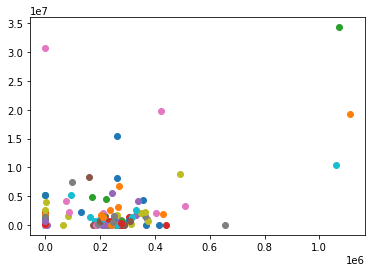

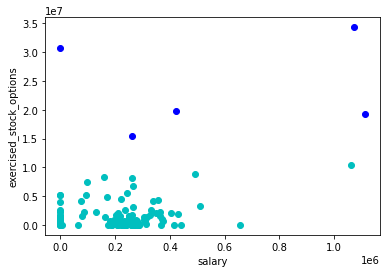

In [4]:
#CLUSTERING
#!/usr/bin/python3

""" 
    Skeleton code for k-means clustering mini-project.
"""

import os
import joblib
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append(os.path.abspath("/home/adebisi/UDACITY PROJECTS/tools/"))
from feature_format import featureFormat, targetFeatureSplit

def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = joblib.load( open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=8).fit(finance_features)
pred = kmeans.predict(finance_features)

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("No predictions object named pred found, no clusters to plot")


In [8]:
'''Add a third feature to features_list, “total_payments". Now rerun clustering, using 3 input features instead of 2 (obviously we can still only visualize the original 2 dimensions). Compare the plot with the clusterings to the one you obtained with 2 input features. Do any points switch clusters? How many? This new clustering, using 3 features, couldn’t have been guessed by eye--it was the k-means algorithm that identified it.

(You'll need to change the code that makes the scatterplot to accommodate 3 features instead of 2, see the comments in the starter code for instructions on how to do this.)
'''

'Add a third feature to features_list, “total_payments". Now rerun clustering, using 3 input features instead of 2 (obviously we can still only visualize the original 2 dimensions). Compare the plot with the clusterings to the one you obtained with 2 input features. Do any points switch clusters? How many? This new clustering, using 3 features, couldn’t have been guessed by eye--it was the k-means algorithm that identified it.\n\n(You\'ll need to change the code that makes the scatterplot to accommodate 3 features instead of 2, see the comments in the starter code for instructions on how to do this.)\n'

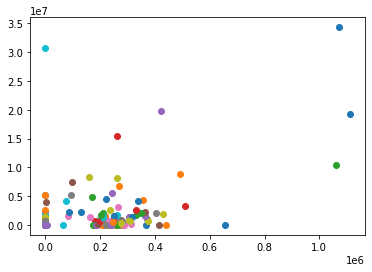

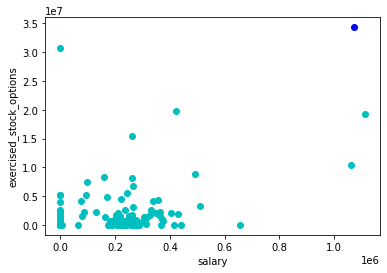

In [10]:
#CLUSTERING
#!/usr/bin/python3

""" 
    Skeleton code for k-means clustering mini-project.
"""

import os
import joblib
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append(os.path.abspath("/home/adebisi/UDACITY PROJECTS/tools/"))
from feature_format import featureFormat, targetFeatureSplit

def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = joblib.load( open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = 'total_payments'
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2)
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=8).fit(finance_features)
pred = kmeans.predict(finance_features)

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("No predictions object named pred found, no clusters to plot")


In [11]:
'''What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?

(NB: if you look at finance_features, there are some "NaN" values that have been cleaned away and 
replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're 
more like points for which we don't have information, and just have to put in a number.
So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there,
ignoring all the "NaN" entries.)'''

'What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?\n\n(NB: if you look at finance_features, there are some "NaN" values that have been cleaned away and \nreplaced with zeroes--so while those might look like the minima, it\'s a bit deceptive because they\'re \nmore like points for which we don\'t have information, and just have to put in a number.\nSo for this question, go back to data_dict and look for the maximum and minimum numbers that show up there,\nignoring all the "NaN" entries.)'

In [15]:
data_dict.items()

dict_items([('METTS MARK', {'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'loan_advances': 'NaN', 'bonus': 600000, 'email_address': 'mark.metts@enron.com', 'restricted_stock_deferred': 'NaN', 'deferred_income': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'from_poi_to_this_person': 38, 'exercised_stock_options': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'long_term_incentive': 'NaN', 'shared_receipt_with_poi': 702, 'restricted_stock': 585062, 'director_fees': 'NaN'}), ('BAXTER JOHN C', {'salary': 267102, 'to_messages': 'NaN', 'deferral_payments': 1295738, 'total_payments': 5634343, 'loan_advances': 'NaN', 'bonus': 1200000, 'email_address': 'NaN', 'restricted_stock_deferred': 'NaN', 'deferred_income': -1386055, 'total_stock_value': 10623258, 'expenses': 11200, 'from_poi_to_this_person': 'NaN', 'exercised_stock_options': 6680544, 'from_messages': 'NaN', 'other': 2660303, 'from_this_person

In [16]:
stock_list = []
for k,v in data_dict.items():
    stock_options = v['exercised_stock_options']
    if stock_options != 'NaN':
        stock_list.append(stock_options)
print(max(stock_list))
print(min(stock_list))

34348384
3285


In [12]:
'''What are the maximum and minimum values taken by “salary”?

(NB: same caveat as in the last quiz. If you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)
'''

'What are the maximum and minimum values taken by “salary”?\n\n(NB: same caveat as in the last quiz. If you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it\'s a bit deceptive because they\'re more like points for which we don\'t have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)\n'

In [17]:
salary_list = []
for k,v in data_dict.items():
    salary = v['salary']
    if salary != 'NaN':
        salary_list.append(salary)
print(max(salary_list))
print(min(salary_list))

1111258
477


In [13]:
'''The plot on the next slide shows the exact same clustering code that you just wrote, but in this example we applied feature scaling before performing the clustering.

We want you to compare the clustering with scaling (on the next slide) with the first clustering visualization you produced, when you used two features in your clustering algorithm.

Notice that now the range of the features has changed to [0.0, 1.0]. That's the only change we've made.

In the next lesson you’ll learn a lot more about what feature scaling means, but for now, just look at the effect on the clusters--which point(s) switch their associated cluster?
Go to Quiz

Compare this plot to the one you obtained at the start of the mini-project (clustering on only two features) to answer this question.
'''

"The plot on the next slide shows the exact same clustering code that you just wrote, but in this example we applied feature scaling before performing the clustering.\n\nWe want you to compare the clustering with scaling (on the next slide) with the first clustering visualization you produced, when you used two features in your clustering algorithm.\n\nNotice that now the range of the features has changed to [0.0, 1.0]. That's the only change we've made.\n\nIn the next lesson you’ll learn a lot more about what feature scaling means, but for now, just look at the effect on the clusters--which point(s) switch their associated cluster?\nGo to Quiz\n\nCompare this plot to the one you obtained at the start of the mini-project (clustering on only two features) to answer this question.\n"

In [18]:
#FEATURE SCALING

'''Apply feature scaling to your k-means clustering code from the last lesson, on the “salary” and “exercised_stock_options” features (use only these two features). What would be the rescaled value of a "salary" feature that had an original value of $200,000, and an "exercised_stock_options" feature of $1 million? (Be sure to represent these numbers as floats, not integers!)'''

'Apply feature scaling to your k-means clustering code from the last lesson, on the “salary” and “exercised_stock_options” features (use only these two features). What would be the rescaled value of a "salary" feature that had an original value of $200,000, and an "exercised_stock_options" feature of $1 million? (Be sure to represent these numbers as floats, not integers!)'

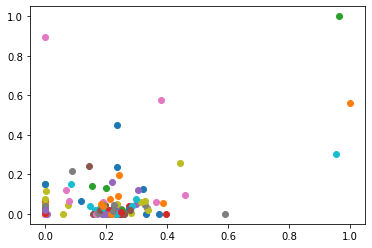

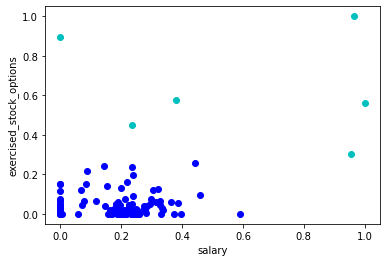

In [26]:
#CLUSTERING
#!/usr/bin/python3

""" 
    Skeleton code for k-means clustering mini-project.
"""

import os
import joblib
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append(os.path.abspath("/home/adebisi/UDACITY PROJECTS/tools/"))
from feature_format import featureFormat, targetFeatureSplit

def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = joblib.load( open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

#FEATURE SCALING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
#feature_3 = 'total_payments'
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )
finance_features_rescaled = scaler.fit_transform(finance_features).astype(float)


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features_rescaled:
    plt.scatter( f1, f2)
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=8).fit(finance_features_rescaled)
pred = kmeans.predict(finance_features_rescaled)

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features_rescaled, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("No predictions object named pred found, no clusters to plot")


In [28]:
X_test = numpy.array([[200000.0,1000000.0]])
X_test_rescaled = scaler.transform(X_test)
print(X_test_rescaled)

[[0.17997621 0.02911345]]


In [29]:
'''One could argue about whether rescaling the financial data is strictly necessary, perhaps we want to keep the information that a $100,000 salary and $40,000,000 in stock options are dramatically different quantities. What if we wanted to cluster based on “from_messages” (the number of email messages sent from a particular email account) and “salary”? Would feature scaling be unnecessary in this case, or critical?'''

'One could argue about whether rescaling the financial data is strictly necessary, perhaps we want to keep the information that a $100,000 salary and $40,000,000 in stock options are dramatically different quantities. What if we wanted to cluster based on “from_messages” (the number of email messages sent from a particular email account) and “salary”? Would feature scaling be unnecessary in this case, or critical?'

In [30]:
print('critical')

critical


In [29]:
#FEATURE SELECTION

#!/usr/bin/python3

import joblib
import numpy
numpy.random.seed(42)
import pickle


### The words (features) and authors (labels), already largely processed.
### These files should have been created from the previous (Lesson 10)
### mini-project.
words_file = "/home/adebisi/UDACITY PROJECTS/ud120-projects-master/feature_selection/word_data.pkl" 
authors_file = "/home/adebisi/UDACITY PROJECTS/ud120-projects-master/feature_selection/email_authors.pkl"
word_data = joblib.load("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/feature_selection/word_data.pkl")
authors = joblib.load("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/feature_selection/email_authors.pkl")



### test_size is the percentage of events assigned to the test set (the
### remainder go into training)
### feature matrices changed to dense representations for compatibility with
### classifier functions in versions 0.15.2 and earlier
from sklearn.model_selection import train_test_split
#from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = train_test_split(word_data, authors, test_size=0.1, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
features_train = vectorizer.fit_transform(features_train)
features_test  = vectorizer.transform(features_test).toarray()


### a classic way to overfit is to use a small number
### of data points and a large number of features;
### train on only 150 events to put ourselves in this regime
features_train = features_train[:150].toarray()
labels_train   = labels_train[:150]


### your code goes here
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
labels_predictions = clf.predict(features_test)
acc = accuracy_score(labels_test,labels_predictions)
acc

1.0

In [31]:
feat_imp_list = clf.feature_importances_
len(feat_imp_list)

2803

In [35]:
#TEXT LEARNING
#parse_out_email_text.py


#!/usr/bin/python3

from nltk.stem.snowball import SnowballStemmer
import string

def parseOutText(f):
    """ given an opened email file f, parse out all text below the
        metadata block at the top
        (in Part 2, you will also add stemming capabilities)
        and return a string that contains all the words
        in the email (space-separated) 
        
        example use case:
        f = open("email_file_name.txt", "r")
        text = parseOutText(f)
        
        """


    f.seek(0)  ### go back to beginning of file (annoying)
    all_text = f.read()

    ### split off metadata
    content = all_text.split("X-FileName:")
    words = ""
    if len(content) > 1:
        ### remove punctuation
        text_string = content[1].translate(str.maketrans('','',string.punctuation))

        ### project part 2: comment out the line below
        #words = text_string



        ### split the text string into individual words, stem each word,
        ### and append the stemmed word to words (make sure there's a single
        ### space between each stemmed word)



    return words

    

def main():
    ff = open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/text_learning/test_email.txt", "r")
    text = parseOutText(ff)
    print(text)



if __name__ == '__main__':
    main()



In [41]:
'''In parseOutText(), comment out the following line:

words = text_string

Augment parseOutText() so that the string it returns has all the words stemmed using a SnowballStemmer (use the nltk package, some examples that I found helpful can be found here: http://www.nltk.org/howto/stem.html ). Rerun parse_out_email_text.py, which will use your updated parseOutText() function--what’s your output now?

Hint: you'll need to break the string down into individual words, stem each word, then recombine all the words into one string.
'''
#!/usr/bin/python3

from nltk.stem.snowball import SnowballStemmer
import string

def parseOutText(f):
    """ given an opened email file f, parse out all text below the
        metadata block at the top
        (in Part 2, you will also add stemming capabilities)
        and return a string that contains all the words
        in the email (space-separated) 
        
        example use case:
        f = open("email_file_name.txt", "r")
        text = parseOutText(f)
        
        """


    f.seek(0)  ### go back to beginning of file (annoying)
    all_text = f.read()

    ### split off metadata
    content = all_text.split("X-FileName:")
    words = ""
    if len(content) > 1:
        ### remove punctuation
        text_string = content[1].translate(str.maketrans('','',string.punctuation))

        ### project part 2: comment out the line below
        #words = text_string



        ### split the text string into individual words, stem each word,
        ### and append the stemmed word to words (make sure there's a single
        ### space between each stemmed word)
        stemmer = SnowballStemmer("english")
        split = text_string.split()  
        text = [stemmer.stem(word) for word in split]
        words = ' '.join(text)
#        for i in range(len(split)):
#            stemm = stemmer.stem(split[i])            
#            text.append(stemm) 
#       words = ' '.join(text)



    return words

    

def main():
    ff = open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/text_learning/test_email.txt", "r")
    text = parseOutText(ff)
    print(text)



if __name__ == '__main__':
    main()



    stemmer = SnowballStemmer("english")
    #split = text_string.split()  
    #text = [stemmer.stem(word) for word in split]
    #words = ' '.join(text)
#        for i in range(len(split)):
#            stemm = stemmer.stem(split[i])            
#            text.append(stemm) 
#       words = ' '.join(text)

hi everyon if you can read this messag your proper use parseouttext pleas proceed to the next part of the project


In [42]:
'''In vectorize_text.py, you will iterate through all the emails from Chris and from Sara. For each email, feed the opened email to parseOutText() and return the stemmed text string. Then do two things:

remove signature words (“sara”, “shackleton”, “chris”, “germani”--bonus points if you can figure out why it's "germani" and not "germany")

append the updated text string to word_data -- if the email is from Sara, append 0 (zero) to from_data, or append a 1 if Chris wrote the email.

Once this step is complete, you should have two lists: one contains the stemmed text of each email, and the second should contain the labels that encode (via a 0 or 1) who the author of that email is.

Running over all the emails can take a little while (5 minutes or more), so we've added a temp_counter to cut things off after the first 200 emails. Of course, once everything is working, you'd want to run over the full dataset.

In the box below, put the string that you get for word_data[152].
'''

'In vectorize_text.py, you will iterate through all the emails from Chris and from Sara. For each email, feed the opened email to parseOutText() and return the stemmed text string. Then do two things:\n\nremove signature words (“sara”, “shackleton”, “chris”, “germani”--bonus points if you can figure out why it\'s "germani" and not "germany")\n\nappend the updated text string to word_data -- if the email is from Sara, append 0 (zero) to from_data, or append a 1 if Chris wrote the email.\n\nOnce this step is complete, you should have two lists: one contains the stemmed text of each email, and the second should contain the labels that encode (via a 0 or 1) who the author of that email is.\n\nRunning over all the emails can take a little while (5 minutes or more), so we\'ve added a temp_counter to cut things off after the first 200 emails. Of course, once everything is working, you\'d want to run over the full dataset.\n\nIn the box below, put the string that you get for word_data[152].\n'

In [7]:
#vectorize_text.py

#!/usr/bin/python3

import os
import joblib
import pickle
import re
import sys
import os

sys.path.append(os.path.abspath("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/tools/"))
#from parse_out_email_text import parseOutText

"""
    Starter code to process the emails from Sara and Chris to extract
    the features and get the documents ready for classification.

    The list of all the emails from Sara are in the from_sara list
    likewise for emails from Chris (from_chris)

    The actual documents are in the Enron email dataset, which
    you downloaded/unpacked in Part 0 of the first mini-project. If you have
    not obtained the Enron email corpus, run startup.py in the tools folder.

    The data is stored in lists and packed away in pickle files at the end.
"""


from_sara  = open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/text_learning/from_sara.txt", "r")
from_chris = open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/text_learning/from_chris.txt", "r")

from_data = []
word_data = []

### temp_counter is a way to speed up the development--there are
### thousands of emails from Sara and Chris, so running over all of them
### can take a long time
### temp_counter helps you only look at the first 200 emails in the list so you
### can iterate your modifications quicker
temp_counter = 0


for name, from_person in [("sara", from_sara), ("chris", from_chris)]:
    for path in from_person:
        ### only look at first 200 emails when developing
        ### once everything is working, remove this line to run over full dataset
        temp_counter += 1
        if temp_counter < 200:
	        path = os.path.join('..', path[:-1])
	        print(path)
	        #email = open(path, "r")

	        ### use parseOutText to extract the text from the opened email


	        ### use str.replace() to remove any instances of the words
	        ### ["sara", "shackleton", "chris", "germani"]


	        ### append the text to word_data


	        ### append a 0 to from_data if email is from Sara, and 1 if email is from Chris


	        #email.close()

print("Emails Processed")
from_sara.close()
from_chris.close()

joblib.dump( word_data, open("your_word_data.pkl", "w") )
joblib.dump( from_data, open("your_email_authors.pkl", "w") )
print('Done')

### in Part 4, do TfIdf vectorization here


../maildir/bailey-s/deleted_items/101.
../maildir/bailey-s/deleted_items/106.
../maildir/bailey-s/deleted_items/132.
../maildir/bailey-s/deleted_items/185.
../maildir/bailey-s/deleted_items/186.
../maildir/bailey-s/deleted_items/187.
../maildir/bailey-s/deleted_items/193.
../maildir/bailey-s/deleted_items/195.
../maildir/bailey-s/deleted_items/214.
../maildir/bailey-s/deleted_items/215.
../maildir/bailey-s/deleted_items/233.
../maildir/bailey-s/deleted_items/242.
../maildir/bailey-s/deleted_items/243.
../maildir/bailey-s/deleted_items/244.
../maildir/bailey-s/deleted_items/246.
../maildir/bailey-s/deleted_items/247.
../maildir/bailey-s/deleted_items/254.
../maildir/bailey-s/deleted_items/259.
../maildir/bailey-s/deleted_items/260.
../maildir/bailey-s/deleted_items/261.
../maildir/bailey-s/deleted_items/263.
../maildir/bailey-s/deleted_items/278.
../maildir/bailey-s/deleted_items/290.
../maildir/bailey-s/deleted_items/296.
../maildir/bailey-s/deleted_items/302.
../maildir/bailey-s/delet

TypeError: write() argument must be str, not bytes

In [59]:
len(word_data)

0

In [60]:
'''Transform the word_data into a tf-idf matrix using the sklearn TfIdf transformation. Remove english stopwords.

You can access the mapping between words and feature numbers using get_feature_names(), which returns a list of all the words in the vocabulary. How many different words are there?
Go to Quiz

Be sure to use the tf-idf Vectorizer class to transform the word data.

Don't forget to remove english stop words when you set up the vectorizer, using sklearn's stop word list (not NLTK).
'''

"Transform the word_data into a tf-idf matrix using the sklearn TfIdf transformation. Remove english stopwords.\n\nYou can access the mapping between words and feature numbers using get_feature_names(), which returns a list of all the words in the vocabulary. How many different words are there?\nGo to Quiz\n\nBe sure to use the tf-idf Vectorizer class to transform the word data.\n\nDon't forget to remove english stop words when you set up the vectorizer, using sklearn's stop word list (not NLTK).\n"

In [62]:
from sklearn.feature_extraction import stop_words

print(len(stop_words.ENGLISH_STOP_WORDS))

# can't directly access a word in a set
# stop_words.ENGLISH_STOP_WORDS[3] will not work, remembers sets do not have order, so no index

# any 10 arbitrary items
s = stop_words.ENGLISH_STOP_WORDS
import random
[random.sample(s, 1)[0] for _ in range(10)]  # returns random 10 elements every time its run


ImportError: cannot import name 'stop_words' from 'sklearn.feature_extraction' (/home/adebisi/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/__init__.py)

In [64]:
#HOw many different words are there?
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english') # using sklearn's stop words

X = vectorizer.fit_transform(word_data)
print(len(vectorizer.get_feature_names()))


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [1]:
'''Transform the word_data into a tf-idf matrix using the sklearn TfIdf transformation. Remove english stopwords.

You can access the mapping between words and feature numbers using get_feature_names(), which returns a list of all the words in the vocabulary. How many different words are there?
Go to Quiz

Be sure to use the tf-idf Vectorizer class to transform the word data.

Don't forget to remove english stop words when you set up the vectorizer, using sklearn's stop word list (not NLTK).
'''

"Transform the word_data into a tf-idf matrix using the sklearn TfIdf transformation. Remove english stopwords.\n\nYou can access the mapping between words and feature numbers using get_feature_names(), which returns a list of all the words in the vocabulary. How many different words are there?\nGo to Quiz\n\nBe sure to use the tf-idf Vectorizer class to transform the word data.\n\nDon't forget to remove english stop words when you set up the vectorizer, using sklearn's stop word list (not NLTK).\n"

In [3]:
from sklearn.feature_extraction import stop_words

print(len(stop_words.ENGLISH_STOP_WORDS))

# can't directly access a word in a set
# stop_words.ENGLISH_STOP_WORDS[3] will not work, remembers sets do not have order, so no index

# any 10 arbitrary items
s = stop_words.ENGLISH_STOP_WORDS
import random
[random.sample(s, 1)[0] for _ in range(10)]  # returns random 10 elements every time its run


ImportError: cannot import name 'stop_words' from 'sklearn.feature_extraction' (/home/adebisi/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/__init__.py)

In [4]:
'''What is word number 34597 in your TfIdf?

(Just to be clear--if the question were "what is word number 100," we would be looking for the word corresponding to vocab_list[100]. Zero-indexed arrays are so confusing to talk about sometimes.)
'''

'What is word number 34597 in your TfIdf?\n\n(Just to be clear--if the question were "what is word number 100," we would be looking for the word corresponding to vocab_list[100]. Zero-indexed arrays are so confusing to talk about sometimes.)\n'

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english') # using sklearn's stop words

X = vectorizer.fit_transform(word_data)
print(len(vectorizer.get_feature_names()))


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [10]:
#PCA
#eigenfaces.py



"""
===================================================
Faces recognition example using eigenfaces and SVMs
===================================================

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  .. _LFW: http://vis-www.cs.umass.edu/lfw/

  original source: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html

"""



print(__doc__)

from time import time
import logging
import pylab as pl
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


###############################################################################
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)

# for machine learning we use the data directly (as relative pixel
# position info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

###############################################################################
# Split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


###############################################################################
# Train a SVM classification model(
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
          'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


###############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting the people names on the testing set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


###############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                      for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

pl.show()




2022-10-03 16:00:45,228 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012



Faces recognition example using eigenfaces and SVMs

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  .. _LFW: http://vis-www.cs.umass.edu/lfw/

  original source: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html




URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [1]:
#VALIDATION
'''You’ll start by building the simplest imaginable (unvalidated) POI identifier. The starter code (validation/validate_poi.py) for this lesson is pretty bare--all it does is read in the data, and format it into lists of labels and features. Create a decision tree classifier (just use the default parameters), train it on all the data (you will fix this in the next part!), and print out the accuracy. THIS IS AN OVERFIT TREE, DO NOT TRUST THIS NUMBER! Nonetheless, what’s the accuracy?'''

'You’ll start by building the simplest imaginable (unvalidated) POI identifier. The starter code (validation/validate_poi.py) for this lesson is pretty bare--all it does is read in the data, and format it into lists of labels and features. Create a decision tree classifier (just use the default parameters), train it on all the data (you will fix this in the next part!), and print out the accuracy. THIS IS AN OVERFIT TREE, DO NOT TRUST THIS NUMBER! Nonetheless, what’s the accuracy?'

In [2]:
#validate_poi.py
#!/usr/bin/python


"""
    Starter code for the validation mini-project.
    The first step toward building your POI identifier!

    Start by loading/formatting the data

    After that, it's not our code anymore--it's yours!
"""
import os
import joblib
import sys
sys.path.append(os.path.abspath("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/tools/"))
from feature_format import featureFormat, targetFeatureSplit

data_dict = joblib.load(open("/home/adebisi/UDACITY PROJECTS/ud120-projects-master/final_project/final_project_dataset.pkl", "rb") )

### first element is our labels, any added elements are predictor
### features. Keep this the same for the mini-project, but you'll
### have a different feature list when you do the final project.
features_list = ["poi", "salary"]

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)



### it's all yours from here forward!  



In [3]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(features, labels)
labels
from sklearn.metrics import accuracy_score

labels_pred = clf.predict(features)

acc = accuracy_score(labels, labels_pred)
acc

0.9894736842105263

In [4]:
'''Now you’ll add in training and testing, so that you get a trustworthy accuracy number. Use the train_test_split validation available in sklearn.cross_validation; hold out 30% of the data for testing and set the random_state parameter to 42 (random_state controls which points go into the training set and which are used for testing; setting it to 42 means we know exactly which events are in which set, and can check the results you get). What’s your updated accuracy?'''

'Now you’ll add in training and testing, so that you get a trustworthy accuracy number. Use the train_test_split validation available in sklearn.cross_validation; hold out 30% of the data for testing and set the random_state parameter to 42 (random_state controls which points go into the training set and which are used for testing; setting it to 42 means we know exactly which events are in which set, and can check the results you get). What’s your updated accuracy?'

In [5]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(features_train, labels_train)
labels_pred = clf.predict(features_test)
acc = accuracy_score(labels_test, labels_pred)
acc

0.6896551724137931

In [6]:
'''Go back to your code from the last lesson, where you built a simple first iteration of a POI identifier using a decision tree and one feature. Copy the POI identifier that you built into the skeleton code in evaluation/evaluate_poi_identifier.py. Recall that at the end of that project, your identifier had an accuracy (on the test set) of 0.724. Not too bad, right? Let’s dig into your predictions a little more carefully.

From Python 3.3 forward, a change to the order in which dictionary keys are processed was made such that the orders are randomized each time the code is run. This will cause some compatibility problems with the graders and project code, which were run under Python 2.7. To correct for this, add the following argument to the featureFormat call on line 25 of evaluate_poi_identifier.py:

sort_keys = '../tools/python2_lesson14_keys.pkl'

This will open up a file in the tools folder with the Python 2 key order.
'''

"Go back to your code from the last lesson, where you built a simple first iteration of a POI identifier using a decision tree and one feature. Copy the POI identifier that you built into the skeleton code in evaluation/evaluate_poi_identifier.py. Recall that at the end of that project, your identifier had an accuracy (on the test set) of 0.724. Not too bad, right? Let’s dig into your predictions a little more carefully.\n\nFrom Python 3.3 forward, a change to the order in which dictionary keys are processed was made such that the orders are randomized each time the code is run. This will cause some compatibility problems with the graders and project code, which were run under Python 2.7. To correct for this, add the following argument to the featureFormat call on line 25 of evaluate_poi_identifier.py:\n\nsort_keys = '../tools/python2_lesson14_keys.pkl'\n\nThis will open up a file in the tools folder with the Python 2 key order.\n"

In [7]:
#EVALUATION
'''How many POIs are predicted for the test set for your POI identifier?

(Note that we said test set! We are not looking for the number of POIs in the whole dataset.)
'''

'How many POIs are predicted for the test set for your POI identifier?\n\n(Note that we said test set! We are not looking for the number of POIs in the whole dataset.)\n'

In [12]:
labels_pred = clf.predict(features_test)
sum(labels_pred)
print(len([e for e in labels_test if e == 1.0]))

29


In [11]:
'''How many people total are in your test set?'''
len(labels_pred)

29

In [14]:
'''If your identifier predicted 0. (not POI) for everyone in the test set, what would its accuracy be?'''


'If your identifier predicted 0. (not POI) for everyone in the test set, what would its accuracy be?'

In [15]:
'''Look at the predictions of your model and compare them to the true test labels. Do you get any true positives? (In this case, we define a true positive as a case where both the actual label and the predicted label are 1)'''
#NO

'Look at the predictions of your model and compare them to the true test labels. Do you get any true positives? (In this case, we define a true positive as a case where both the actual label and the predicted label are 1)'

In [19]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

print(classification_report(labels_test, labels_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.74      0.82        27
         1.0       0.00      0.00      0.00         2

    accuracy                           0.69        29
   macro avg       0.45      0.37      0.41        29
weighted avg       0.85      0.69      0.76        29



In [20]:
'''As you may now see, having imbalanced classes like we have in the Enron dataset (many more non-POIs than POIs) introduces some special challenges, namely that you can just guess the more common class label for every point, not a very insightful strategy, and still get pretty good accuracy!

Precision and recall can help illuminate your performance better. Use the precision_score and recall_score available in sklearn.metrics to compute those quantities.

What’s the precision?
'''
print(precision_score(labels_test, labels_pred))

0.0


In [21]:
'''What’s the recall?

(Note: you may see a message like UserWarning: The precision and recall are equal to zero for some labels. Just like the message says, there can be problems in computing other metrics (like the F1 score) when precision and/or recall are zero, and it wants to warn you when that happens.)

Obviously this isn’t a very optimized machine learning strategy (we haven’t tried any algorithms besides the decision tree, or tuned any parameters, or done any feature selection), and now seeing the precision and recall should make that much more apparent than the accuracy did.'''

print(recall_score(labels_test, labels_pred))

0.0


In [22]:
'''In the final project you’ll work on optimizing your POI identifier, using many of the tools learned in this course. Hopefully one result will be that your precision and/or recall will go up, but then you’ll have to be able to interpret them.

Here are some made-up predictions and true labels for a hypothetical test set; fill in the following boxes to practice identifying true positives, false positives, true negatives, and false negatives. Let’s use the convention that “1” signifies a positive result, and “0” a negative.

predictions = [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1]
true labels = [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]

How many true positives are there?
'''

predictions = [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1]
true_labels = [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]

cm = confusion_matrix(true_labels, predictions)
cm

array([[9, 3],
       [2, 6]])

In [23]:
#True positives = 6
#true negatives = 9
#false positives = 3
#false negatives = 2

In [24]:
'''predictions = [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1]
true labels = [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]

What's the precision of this classifier?
'''
print(precision_score(true_labels, predictions))

0.6666666666666666


In [25]:
#WHat's the recall
print(recall_score(true_labels, predictions))

0.75
